# Charging Station Behavior
### Georgia Tech EV Charging Station transactions and miles driven
link: https://www.kaggle.com/claytonmiller/campus-electric-vehicle-charging-stations-behavior  
git https://github.com/Sheldon-Zhang/Gatech_EV_Analytics
<hr>

# Imports
<hr>

In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Ingestion
<hr>

In [3]:

df = pd.read_csv('../data/ev_charging_datasets/Georga_EV_charge_behavior/EV-Charging-Raw-Data.csv')

In [4]:
df.shape

(1530, 30)

In [5]:
df.head(3)

,Label 01,Lable 02,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Postal Code,Country,Label 07,Label 08,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID
0,A,A,Georgia Tech,2/13/2015 13:30,EST,2/13/2015 14:42,EST,2/13/2015 11:46,1:12:10,1:11:50,...,30308,United States,A,A,USD,1.02,Plug Out at Vehicle,540,30102,254811.0
1,A,A,Georgia Tech,2/13/2015 12:47,EST,2/13/2015 13:45,EST,2/13/2015 10:46,0:58:39,0:58:15,...,30308,United States,A,A,USD,0.83,Customer,539,30269,323807.0
2,A,A,Georgia Tech,2/13/2015 11:50,EST,2/13/2015 13:02,EST,2/13/2015 10:04,1:11:40,1:11:24,...,30308,United States,A,A,USD,1.02,Plug Out at Vehicle,538,30253,345151.0


In [6]:
df.tail(3)

,Label 01,Lable 02,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Postal Code,Country,Label 07,Label 08,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID
1527,A,A,Georgia Tech,2/13/2015 6:35,EST,NaN,EST,NaN,9:05:05,6:38:01,...,30308,United States,A,A,NaN,0.0,NaN,791,30114,235945.0
1528,A,A,Georgia Tech,2/13/2015 15:03,EST,NaN,EST,NaN,0:35:09,0:34:44,...,30308,United States,A,A,NaN,0.0,NaN,1423857773,30345,183185.0
1529,A,A,Georgia Tech,2/13/2015 7:43,EST,NaN,EST,NaN,7:55:25,7:36:11,...,30308,United States,A,A,NaN,0.0,NaN,792,30622,217113.0


In [7]:
df.head(1).T

,0
Label 01,A
Lable 02,A
Org Name,Georgia Tech
Start Date,2/13/2015 13:30
Start Time Zone,EST
End Date,2/13/2015 14:42
End Time Zone,EST
Transaction Date (Pacific Time),2/13/2015 11:46
Total Duration (hh:mm:ss),1:12:10
Charging Time (hh:mm:ss),1:11:50


In [8]:
df.columns



Index(['Label 01', 'Lable 02', 'Org Name', 'Start Date', 'Start Time Zone',
       'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'Label 03', 'Label 04', 'Label 05',
       'Label 06', 'Postal Code', 'Country', 'Label 07', 'Label 08',
       'Currency', 'Fee', 'Ended By', 'Plug In Event Id', 'Driver Postal Code',
       'User ID'],
      dtype='object')

## Quick Exploration
<hr>
<br>

#### Driver Postal Codes

In [9]:
# Cleans up 'Driver Postal Code' from NANs and other random 

Driver_Postal_Code = []

for x in df['Driver Postal Code'].dropna():
    if len(x) == 5:
        Driver_Postal_Code.append(int(x))

# displays count of each zip code 
np.unique(Driver_Postal_Code,return_counts=True) 

(array([28207, 30002, 30004, 30005, 30009, 30016, 30019, 30022, 30024,
        30030, 30033, 30039, 30040, 30041, 30043, 30044, 30045, 30047,
        30062, 30064, 30066, 30067, 30068, 30075, 30076, 30080, 30082,
        30084, 30096, 30097, 30101, 30102, 30110, 30113, 30114, 30126,
        30127, 30134, 30135, 30141, 30144, 30152, 30168, 30189, 30215,
        30253, 30263, 30268, 30269, 30276, 30306, 30307, 30308, 30309,
        30312, 30316, 30318, 30319, 30327, 30328, 30338, 30339, 30341,
        30342, 30345, 30346, 30350, 30360, 30363, 30458, 30506, 30518,
        30519, 30542, 30606, 30622, 30701, 31312, 31794, 33331, 48326,
        98052]),
 array([  1,   1,  28,   3,   2,   4,  11,  26,  34,   1,   8,   6,   3,
         15,  12,   6,   1,   2,  96,   7,   2,   2,  36,  65,  14,  30,
         21,   7,  30,  40,  12,  60,   5,   1,  93,   6,   2,   2,   2,
         10,   6,   2,   1,   2,  16,   7,   1,   5,  44,   1,  32,   6,
         60,   9,   6,   5,  74,  13,   2,   7,   7,

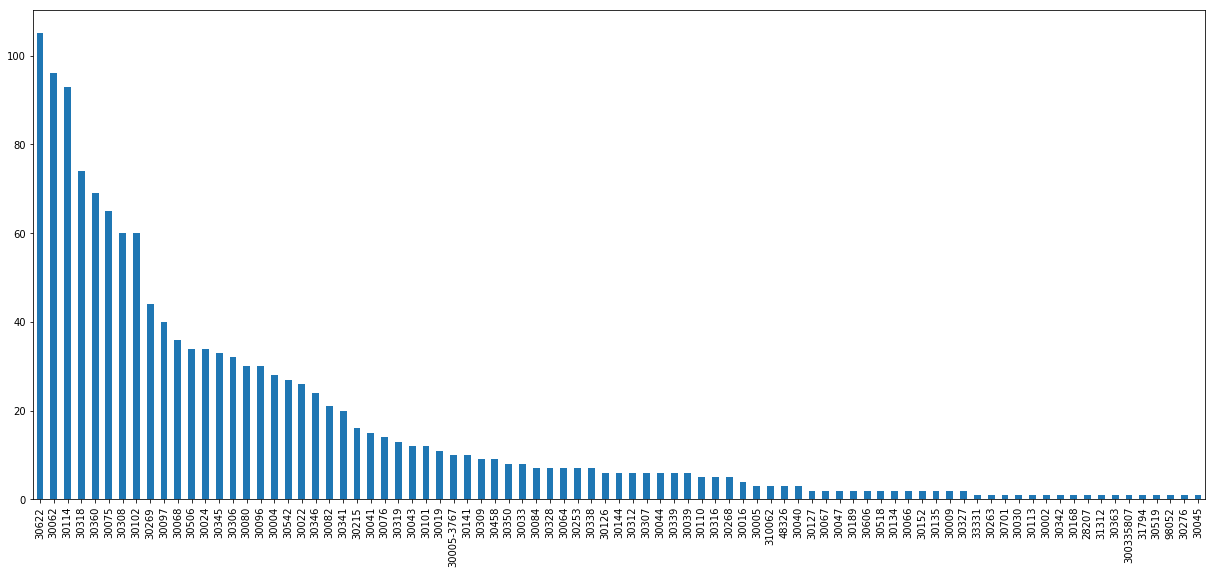

In [19]:
df['Driver Postal Code'].value_counts().plot(kind='bar', figsize = (21,9))

28.666666666666668


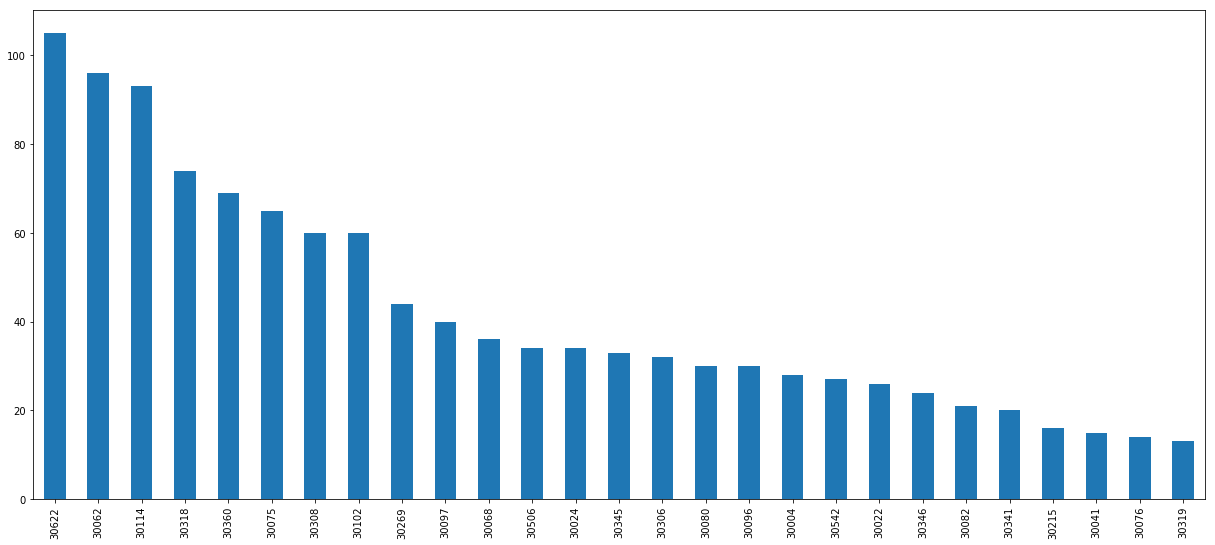

In [47]:
# Top 1/3 of Driver Postal Code 

print(len(pd.unique(df['Driver Postal Code'])) / 3 )

# Variable - index zip code , [1] counts
top_third_driverPostalCode = df['Driver Postal Code'].value_counts().sort_values(axis=0, ascending = False).head(27)

# Graph 
df['Driver Postal Code'].value_counts().sort_values(axis=0, ascending = False).head(27).plot(kind='bar', figsize = (21,9));

In [10]:
df['GHG Savings (kg)'].mean()

3.906702614379085

In [ ]:
df['Postal Code'].value_counts()

30308    1530
Name: Postal Code, dtype: int64

In [ ]:
# A slice of the data frame

df[['Start Date',
'Total Duration (hh:mm:ss)',
'Charging Time (hh:mm:ss)',
'Energy (kWh)',
'Port Type',
'Gasoline Savings (gallons)',
'Postal Code',
'Ended By',
'Fee',
'Driver Postal Code',
'User ID']]

,Start Date,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),Port Type,Gasoline Savings (gallons),Postal Code,Ended By,Fee,Driver Postal Code,User ID
0,2/13/2015 13:30,1:12:10,1:11:50,6.249,Level 2,0.784,30308,Plug Out at Vehicle,1.02,30102,254811.0
1,2/13/2015 12:47,0:58:39,0:58:15,4.352,Level 2,0.546,30308,Customer,0.83,30269,323807.0
2,2/13/2015 11:50,1:11:40,1:11:24,4.341,Level 2,0.545,30308,Plug Out at Vehicle,1.02,30253,345151.0
3,2/13/2015 7:43,4:50:48,3:19:30,7.857,Level 2,0.986,30308,Plug Out at Vehicle,4.12,30062,261355.0
4,2/13/2015 9:33,1:58:46,1:58:14,6.075,Level 2,0.762,30308,Plug Out at Vehicle,1.68,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1525,1/10/2014 7:29,1:50:23,1:49:49,5.389,Level 2,0.676,30308,NaN,0.00,30064,202419.0
1526,1/4/2014 11:38,0:01:50,0:01:24,0.063,Level 2,0.008,30308,NaN,0.00,30005-3767,8027.0
1527,2/13/2015 6:35,9:05:05,6:38:01,17.071,Level 2,2.142,30308,NaN,0.00,30114,235945.0
1528,2/13/2015 15:03,0:35:09,0:34:44,2.125,Level 2,0.267,30308,NaN,0.00,30345,183185.0


## Questions 
<hr>

In [ ]:
"""
Date can be used to say when and how much load is put on the Grid
Q ?what is the best way to show time on a graph?
Q ?Show amount of energy used per time 
Q ?is there a normal time period when people charge and how much do they charge?
Q ? do users charge normal at the same time?  what is the propability they keep to their pattern?

Q Is there more charge from a particular user zip code?
Q what if we log that charge that it is not taking place at their home charging
Q most popular 'driver postal code'
Q 

basic questions

averge fee 
averge charging time
driver postal code. 

most popular Port type
avg charing time & energy === per port type 

"""

"""
Questons about the data 

how are they computing GHG savings in (KG)
how are they computing Gasoline savings (gallons)

"""

'\nQuestons about the data \n\nhow are they computing GHG savings in (KG)\nhow are they computing Gasoline savings (gallons)\n\n'